# Visualizing the kinematics of relativistic wave packets

Author of the paper: Bernd Thaller

Author of this notebook: Óscar Amaro http://epp.tecnico.ulisboa.pt/team/ , https://github.com/RePlasma , https://github.com/OsAmaro

__Summary__

Here we compute the evolution of the "spinor" components $\psi_1$ and $\psi_4$ using the Euler method.

ZITTERBEWEGUNG: "The white curve shows the world line of the average position, which obviously does not obey classical (relativistic) kinematics."

The extension to negative time simulated by reflecting the numerical solution in time and space (flip flip)

In [50]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import matplotlib.ticker as ticker
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")
import imageio
import os
from tqdm import tqdm
import time
import pyglet

## Example 1

In [51]:
def LFEX1(t, x, dt, dx):
    u = np.zeros(shape=(len(t),len(x)), dtype=np.complex128)
    v = np.zeros(shape=(len(t),len(x)), dtype=np.complex128)
    for tt in tqdm(range(len(t))):
        if tt == 0:
            u[tt, :] = (1/(32*pi))**0.25 * np.exp(-x**2/16)
            v[tt, :] = (1/(32*pi))**0.25 * np.exp(-x**2/16)
        else:
            for xx in range(len(x)):
                if xx == 0 or xx == len(x) - 1:
                    u[tt, xx] = 0
                    v[tt, xx] = 0
                else:
                    psi1 = u[tt-1, xx]
                    psi2 = v[tt-1, xx]
                    dpsi1dx = (u[tt-1, xx+1]-u[tt-1, xx-1])/(2*dx)
                    dpsi2dx = (v[tt-1, xx+1]-v[tt-1, xx-1])/(2*dx)
                    u[tt, xx] = psi1 + dt*( -1j*psi1 - dpsi2dx )
                    v[tt, xx] = psi2 + dt*( +1j*psi2 - dpsi1dx )
    return u, v

In [58]:
t_min, t_max = 0, 30.0
x_min, x_max = -30, 30
dx, dt = 0.1, 0.01/2

xlst = np.arange(x_min, x_max + dx, dx)
tlst = np.arange(t_min, t_max + dt, dt)

print("dim x: {0}, dim t:{1}".format(len(xlst), len(tlst)))
time.sleep(1)
 
uEX1, vEX1 = LFEX1(tlst, xlst, dt, dx)

dim x: 601, dim t:6001


100%|██████████| 6001/6001 [00:17<00:00, 334.21it/s]


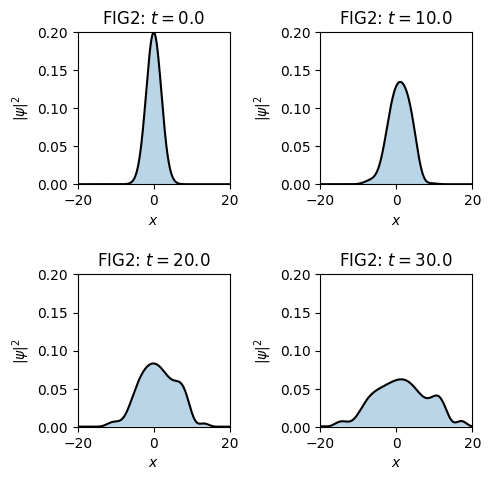

In [59]:
fig, axes = plt.subplots(2,2,figsize=(5,5))

zz = np.argmin(np.abs(tlst-0))
rho = np.abs(uEX1[zz,:])**2 + np.abs(vEX1[zz,:])**2
axes[0,0].fill_between(xlst, rho, alpha=0.3)
axes[0,0].plot(xlst, rho, 'k-')
axes[0,0].set_title('FIG2: $t=${}'.format(round(tlst[zz], 4)))
axes[0,0].set_xlabel(r'$x$')
axes[0,0].set_ylabel(r'$|\psi|^2$')
axes[0,0].set_xlim([-20,20])
axes[0,0].set_ylim([0,0.2])
axes[0,0].set_box_aspect(aspect=1)

zz = np.argmin(np.abs(tlst-10))
rho = np.abs(uEX1[zz,:])**2 + np.abs(vEX1[zz,:])**2
axes[0,1].fill_between(xlst, rho, alpha=0.3)
axes[0,1].plot(xlst, rho, 'k-')
axes[0,1].set_title('FIG2: $t=${}'.format(round(tlst[zz], 4)))
axes[0,1].set_xlabel(r'$x$')
axes[0,1].set_ylabel(r'$|\psi|^2$')
axes[0,1].set_xlim([-20,20])
axes[0,1].set_ylim([0,0.2])
axes[0,1].set_box_aspect(aspect=1)

zz = np.argmin(np.abs(tlst-20))
rho = np.abs(uEX1[zz,:])**2 + np.abs(vEX1[zz,:])**2
axes[1,0].fill_between(xlst, rho, alpha=0.3)
axes[1,0].plot(xlst, rho, 'k-')
axes[1,0].set_title('FIG2: $t=${}'.format(round(tlst[zz], 4)))
axes[1,0].set_xlabel(r'$x$')
axes[1,0].set_ylabel(r'$|\psi|^2$')
axes[1,0].set_xlim([-20,20])
axes[1,0].set_ylim([0,0.2])
axes[1,0].set_box_aspect(aspect=1)

zz = np.argmin(np.abs(tlst-30))
rho = np.abs(uEX1[zz,:])**2 + np.abs(vEX1[zz,:])**2
axes[1,1].fill_between(xlst, rho, alpha=0.3)
axes[1,1].plot(xlst, rho, 'k-')
axes[1,1].set_title('FIG2: $t=${}'.format(round(tlst[zz], 4)))
axes[1,1].set_xlabel(r'$x$')
axes[1,1].set_ylabel(r'$|\psi|^2$')
axes[1,1].set_xlim([-20,20])
axes[1,1].set_ylim([0,0.2])
axes[1,1].set_box_aspect(aspect=1)
plt.tight_layout()
plt.show()

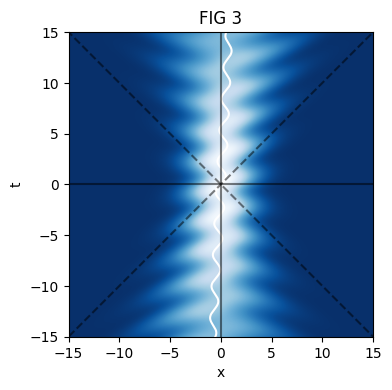

In [60]:
# probability
rho = np.abs(uEX1)**2+np.abs(vEX1)**2

# coordinate and time arrays
xlst = np.linspace(x_min, x_max, len(rho[1,:]))
tlst = np.linspace(t_min, t_max, len(rho[:,1]))

# average coordinate
xavg = np.array([np.sum(rho[i,:]*xlst)/np.sum(rho[i,:]) for i in range(len(rho[:,1]))])
xaux = np.linspace(0,1)

# plot
fig, axes = plt.subplots(figsize=(4,4))

im0 = axes.imshow(rho, interpolation='bilinear', origin='lower', extent=[x_min, x_max, t_min, t_max],
              cmap=cm.Blues_r) # vmax=1, vmin=-1,
axes.images.append(im0)
im1 = axes.imshow(np.fliplr(np.flipud(rho)), interpolation='bilinear', origin='lower', extent=[x_min, x_max, -t_max, t_min],
              cmap=cm.Blues_r) # vmax=1, vmin=-1,
axes.images.append(im1)
# plot average position in time
plt.plot(xavg,tlst,'w')
plt.plot(-xavg,-tlst,'w')
plt.plot(60*xaux-30,60*xaux-30,'k--',alpha=0.5)
plt.plot(60*xaux-30,30-60*xaux,'k--',alpha=0.5)
plt.plot(0*xaux,60*xaux-30,'k-',alpha=0.5)
plt.plot(60*xaux-30,0*xaux,'k-',alpha=0.5)
axes.set_xlim([x_min, x_max])
axes.set_ylim([-t_max, t_max])
axes.set_xlim([-15, +15])
axes.set_ylim([-15,+15])
axes.set_xlabel(r'x')
axes.set_ylabel(r't')
axes.set_box_aspect(aspect=1) #x_max/t_max)
plt.tight_layout()
plt.title('FIG 3')
plt.show()

## Example 2

In [61]:
def LFEX2(t, x, dt, dx):
    u = np.zeros(shape=(len(t),len(x)), dtype=np.complex128)
    v = np.zeros(shape=(len(t),len(x)), dtype=np.complex128)
    for tt in tqdm(range(len(t))):
        if tt == 0:
            u[tt, :] = (1/(32*pi))**0.25 * np.exp(-x**2/16 - 1j*3*x/4)
            v[tt, :] = (1/(32*pi))**0.25 * np.exp(-x**2/16 - 1j*3*x/4)
        else:
            for xx in range(len(x)):
                if xx == 0 or xx == len(x) - 1:
                    u[tt, xx] = 0
                    v[tt, xx] = 0
                else:
                    psi1 = u[tt-1, xx]
                    psi2 = v[tt-1, xx]
                    dpsi1dx = (u[tt-1, xx+1]-u[tt-1, xx-1])/(2*dx)
                    dpsi2dx = (v[tt-1, xx+1]-v[tt-1, xx-1])/(2*dx)
                    u[tt, xx] = psi1 + dt*( -1j*psi1 - dpsi2dx )
                    v[tt, xx] = psi2 + dt*( +1j*psi2 - dpsi1dx )
    return u, v

In [69]:
t_min, t_max = 0, 30.0
x_min, x_max = -50, 50
dx, dt = 0.1/2, 0.01/2

xlst = np.arange(x_min, x_max + dx, dx)
tlst = np.arange(t_min, t_max + dt, dt)

print("dim x: {0}, dim t:{1}".format(len(xlst), len(tlst)))
time.sleep(1)
 
uEX2, vEX2 = LFEX2(tlst, xlst, dt, dx)

dim x: 2001, dim t:6001


100%|██████████| 6001/6001 [01:04<00:00, 92.40it/s] 


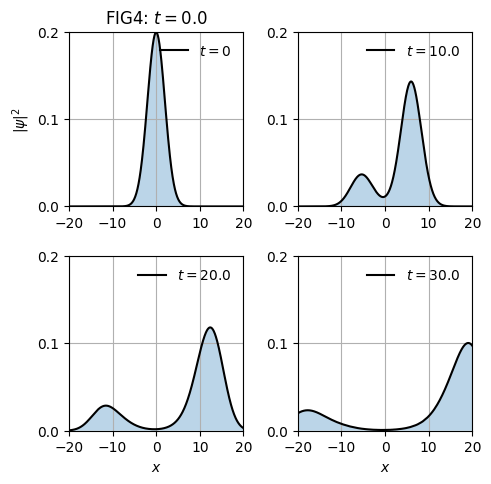

In [70]:
fig, axes = plt.subplots(2,2,figsize=(5,5))

zz = np.argmin(np.abs(tlst-0))
rho = np.abs(uEX2[zz,:])**2 + np.abs(vEX2[zz,:])**2
axes[0,0].fill_between(xlst, rho, alpha=0.3)
axes[0,0].plot(xlst, rho, 'k-', label=r'$t=0$')
axes[0,0].set_title('FIG4: $t=${}'.format(round(tlst[zz], 4)))
axes[0,0].set_ylabel(r'$|\psi|^2$')
axes[0,0].set_xlim([-20,+20])
axes[0,0].set_ylim([0,0.2])
axes[0,0].set_xticks([-20,-10,0,+10,+20])
axes[0,0].set_yticks([0,0.1,0.2])
axes[0,0].set_box_aspect(aspect=1)
axes[0,0].legend(loc="upper right",frameon=False)
axes[0,0].grid()

zz = np.argmin(np.abs(tlst-10))
rho = np.abs(uEX2[zz,:])**2 + np.abs(vEX2[zz,:])**2
axes[0,1].fill_between(xlst, rho, alpha=0.3)
axes[0,1].plot(xlst, rho, 'k-', label=r'$t=${}'.format(round(tlst[zz], 4)))
axes[0,1].set_xlim([-20,+20])
axes[0,1].set_ylim([0,0.2])
axes[0,1].set_xticks([-20,-10,0,+10,+20])
axes[0,1].set_yticks([0,0.1,0.2])
axes[0,1].set_box_aspect(aspect=1)
axes[0,1].legend(frameon=False)
axes[0,1].grid()

zz = np.argmin(np.abs(tlst-20))
rho = np.abs(uEX2[zz,:])**2 + np.abs(vEX2[zz,:])**2
axes[1,0].fill_between(xlst, rho, alpha=0.3)
axes[1,0].plot(xlst, rho, 'k-', label=r'$t=${}'.format(round(tlst[zz], 4)))
axes[1,0].set_xlabel(r'$x$')
axes[1,0].set_xlim([-20,+20])
axes[1,0].set_ylim([0,0.2])
axes[1,0].set_xticks([-20,-10,0,+10,+20])
axes[1,0].set_yticks([0,0.1,0.2])
axes[1,0].set_box_aspect(aspect=1)
axes[1,0].legend(frameon=False)
axes[1,0].grid()

zz = np.argmin(np.abs(tlst-30))
rho = np.abs(uEX2[zz,:])**2 + np.abs(vEX2[zz,:])**2
axes[1,1].fill_between(xlst, rho, alpha=0.3)
axes[1,1].plot(xlst, rho, 'k-', label=r'$t=${}'.format(round(tlst[zz], 4)))
axes[1,1].set_xlabel(r'$x$')
axes[1,1].set_xlim([-20,+20])
axes[1,1].set_ylim([0,0.2])
axes[1,1].set_xticks([-20,-10,0,+10,+20])
axes[1,1].set_yticks([0,0.1,0.2])
axes[1,1].set_box_aspect(aspect=1)
axes[1,1].legend(frameon=False)
axes[1,1].grid()

plt.tight_layout()
plt.show()

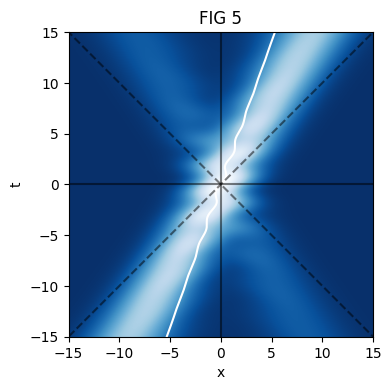

In [71]:
# probability
rho = np.abs(uEX2)**2+np.abs(vEX2)**2

# coordinate and time arrays
xlst = np.linspace(x_min, x_max, len(rho[1,:]))
tlst = np.linspace(t_min, t_max, len(rho[:,1]))

# average coordinate
xavg = np.array([np.sum(rho[i,:]*xlst)/np.sum(rho[i,:]) for i in range(len(rho[:,1]))])
xaux = np.linspace(0,1)

# plot
fig, axes = plt.subplots(figsize=(4,4))

im0 = axes.imshow(rho, interpolation='bilinear', origin='lower', extent=[x_min, x_max, t_min, t_max],
              cmap=cm.Blues_r) # vmax=1, vmin=-1,
axes.images.append(im0)
im1 = axes.imshow(np.fliplr(np.flipud(rho)), interpolation='bilinear', origin='lower', extent=[x_min, x_max, -t_max, t_min],
              cmap=cm.Blues_r) # vmax=1, vmin=-1,
axes.images.append(im1)
# plot average position in time
plt.plot(xavg,tlst,'w')
plt.plot(-xavg,-tlst,'w')
plt.plot(60*xaux-30,60*xaux-30,'k--',alpha=0.5)
plt.plot(60*xaux-30,30-60*xaux,'k--',alpha=0.5)
plt.plot(0*xaux,60*xaux-30,'k-',alpha=0.5)
plt.plot(60*xaux-30,0*xaux,'k-',alpha=0.5)
axes.set_xlim([x_min, x_max])
axes.set_ylim([-t_max, t_max])
axes.set_xlim([-15, +15])
axes.set_ylim([-15,+15])
axes.set_xlabel(r'x')
axes.set_ylabel(r't')
axes.set_box_aspect(aspect=1)
plt.tight_layout()
plt.title('FIG 5')
plt.show()

## Example 3

In [77]:
def LFEX3(t, x, dt, dx):
    u = np.zeros(shape=(len(t),len(x)), dtype=np.complex128)
    v = np.zeros(shape=(len(t),len(x)), dtype=np.complex128)
    for tt in tqdm(range(len(t))):
        if tt == 0:
            u[tt, :] = (1/(4*pi))**0.25 * np.exp(-x**2/8)
            v[tt, :] = (1/(32*pi))**0.25 * np.exp(-x**2/16) * 0
        else:
            for xx in range(len(x)):
                if xx == 0 or xx == len(x) - 1:
                    u[tt, xx] = 0
                    v[tt, xx] = 0
                else:
                    psi1 = u[tt-1, xx]
                    psi2 = v[tt-1, xx]
                    dpsi1dx = (u[tt-1, xx+1]-u[tt-1, xx-1])/(2*dx)
                    dpsi2dx = (v[tt-1, xx+1]-v[tt-1, xx-1])/(2*dx)
                    u[tt, xx] = psi1 + dt*( -1j*psi1 - dpsi2dx )
                    v[tt, xx] = psi2 + dt*( +1j*psi2 - dpsi1dx )
    return u, v

In [78]:
t_min, t_max = 0, 30.0
x_min, x_max = -30, 30
dx, dt = 0.1, 0.01

xlst = np.arange(x_min, x_max + dx, dx)
tlst = np.arange(t_min, t_max + dt, dt)

print("dim x: {0}, dim t:{1}".format(len(xlst), len(tlst)))
time.sleep(1)
 
uEX3, vEX3 = LFEX3(tlst, xlst, dt, dx)

dim x: 601, dim t:3001


100%|██████████| 3001/3001 [00:08<00:00, 354.65it/s]


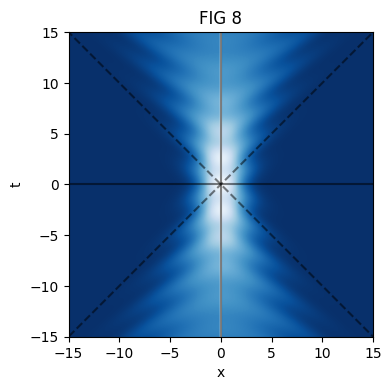

In [79]:
# probability
rho = np.abs(uEX3)**2+np.abs(vEX3)**2

# coordinate and time arrays
xlst = np.linspace(x_min, x_max, len(rho[1,:]))
tlst = np.linspace(t_min, t_max, len(rho[:,1]))

# average coordinate
xavg = np.array([np.sum(rho[i,:]*xlst)/np.sum(rho[i,:]) for i in range(len(rho[:,1]))])
xaux = np.linspace(0,1)

# plot
fig, axes = plt.subplots(figsize=(4,4))

im0 = axes.imshow(rho, interpolation='bilinear', origin='lower', extent=[x_min, x_max, t_min, t_max],
              cmap=cm.Blues_r)
axes.images.append(im0)
im1 = axes.imshow(np.fliplr(np.flipud(rho)), interpolation='bilinear', origin='lower', extent=[x_min, x_max, -t_max, t_min],
              cmap=cm.Blues_r)
axes.images.append(im1)
# plot average position in time
plt.plot(xavg,tlst,'w')
plt.plot(-xavg,-tlst,'w')
plt.plot(60*xaux-30,60*xaux-30,'k--',alpha=0.5)
plt.plot(60*xaux-30,30-60*xaux,'k--',alpha=0.5)
plt.plot(0*xaux,60*xaux-30,'k-',alpha=0.5)
plt.plot(60*xaux-30,0*xaux,'k-',alpha=0.5)
axes.set_xlim([x_min, x_max])
axes.set_ylim([-t_max, t_max])
axes.set_xlim([-15, +15])
axes.set_ylim([-15,+15])
axes.set_xlabel(r'x')
axes.set_ylabel(r't')
axes.set_box_aspect(aspect=1)
plt.tight_layout()
plt.title('FIG 8')
plt.show()